# Principal Component Analysis 

This is a notebook that explores the use of Principal Component Analysis (PCA) to analyze a 6-dimensional space of important social/economic factor in various countries. The goal is to try and find principal components that can perhaps help us figure out what metrics are important in gauging the overall happiness of citizens of different countries.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [14]:
# Read in the dataset
data = pd.read_csv('world-happiness-report-2021-v3.csv')
data.head(n=10)

,Country,Log GDP per Capita,Social Support,Life Expectancy,Freedom Perception,Generosity Levels,Corruption Perception,Region
0,Finland,10.775,0.954,72.0,0.949,-0.098,0.186,3
1,Denmark,10.933,0.954,72.7,0.946,0.030,0.179,3
2,Switzerland,11.117,0.942,74.4,0.919,0.025,0.292,3
3,Iceland,10.878,0.983,73.0,0.955,0.160,0.673,3
4,Netherlands,10.932,0.942,72.4,0.913,0.175,0.338,3
5,Norway,11.053,0.954,73.3,0.960,0.093,0.270,3
6,Sweden,10.867,0.934,72.7,0.945,0.086,0.237,3
7,Luxembourg,11.647,0.908,72.6,0.907,-0.034,0.386,3
8,New Zealand,10.643,0.948,73.4,0.929,0.134,0.242,3
9,Austria,10.906,0.934,73.3,0.908,0.042,0.481,3


In [15]:
# Separate the string columns from the numeric columns
string_columns = data[['Country', 'Region']]
numeric_columns = data.drop(['Country', 'Region'], axis=1)

# Scale the numeric columns
scaler = StandardScaler()
numeric_columns_scaled = scaler.fit_transform(numeric_columns)

# Rejoin the scaled numeric columns with the string columns
df = pd.DataFrame(numeric_columns_scaled, columns=numeric_columns.columns)

# Check out the scaled dataframe now that all values have mean ~ 0 and SD ~ 1
df.head(n=10)

,Log GDP per Capita,Social Support,Life Expectancy,Freedom Perception,Generosity Levels,Corruption Perception
0,1.162885,1.216171,1.039750,1.393550,-0.551886,-3.031228
1,1.299717,1.216171,1.143618,1.366990,0.300594,-3.070416
2,1.459064,1.111370,1.395869,1.127948,0.267294,-2.437802
3,1.252086,1.469440,1.188133,1.446671,1.166393,-0.304829
4,1.298851,1.111370,1.099103,1.074828,1.266293,-2.180278
5,1.403639,1.216171,1.232648,1.490938,0.720173,-2.560966
6,1.242559,1.041503,1.143618,1.358137,0.673553,-2.745712
7,1.918055,0.814434,1.128780,1.021707,-0.125646,-1.911557
8,1.048571,1.163771,1.247486,1.216482,0.993233,-2.717720
9,1.276334,1.041503,1.232648,1.030561,0.380514,-1.379713


## Compute PCA with just two components to assess performance

In [16]:
pca = PCA(n_components = 2)
pca.fit(df)

# Accessing the PCA vectors
pca_vectors = pca.components_

# Creating a DataFrame to display the weightings
weightings_df = pd.DataFrame(pca_vectors, columns=df.columns, index=['PC1', 'PC2'])

In [17]:
x_pca = pca.transform(df)
df.shape
x_pca.shape

(149, 2)

## Preliminary results of PCA before applying clustering methods

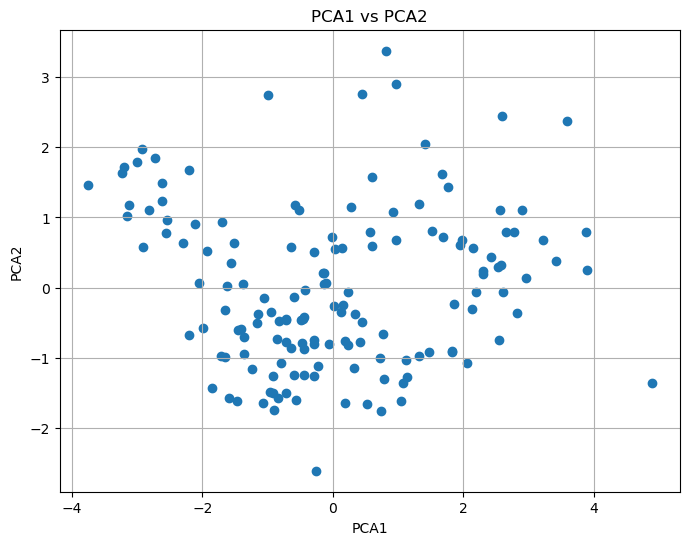

In [18]:
# Extracting PCA1 and PCA2 from the transformed data
PCA1 = x_pca[:, 0]
PCA2 = x_pca[:, 1]

# Plotting PCA1 vs PCA2
plt.figure(figsize=(8, 6))
plt.scatter(PCA1, PCA2, alpha=1)
plt.title('PCA1 vs PCA2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

## Apply agglomerative clustering on the 2D PCA results
Now that we've obtained the 2-dimensional PCA representation of the points, we can apply a well-known clustering methods to see how it performs.

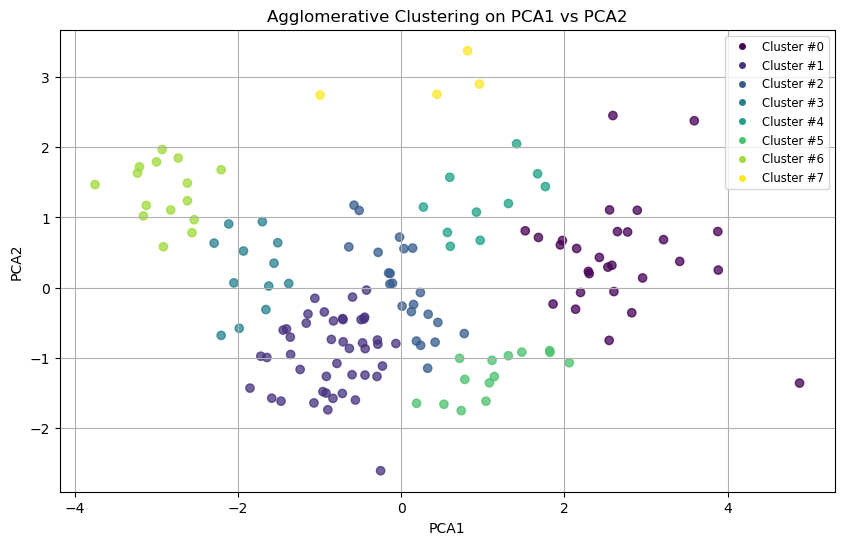

In [20]:
# Perform agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=8, linkage='ward', distance_threshold=None)
cluster_labels = cluster.fit_predict(x_pca)

# Plotting the clustered data
plt.figure(figsize=(10, 6))  # Adjust figsize as needed
scatter = plt.scatter(PCA1, PCA2, c=cluster_labels, cmap='viridis', alpha=0.75)
plt.title('Agglomerative Clustering on PCA1 vs PCA2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)

# Create a legend with cluster numbers
unique_clusters = sorted(set(cluster_labels))
cluster_legend = {label: f'Cluster #{label}' for label in unique_clusters}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color)
                  for label, color in zip(cluster_legend.values(), scatter.to_rgba(unique_clusters))]
plt.legend(handles=legend_handles, loc='upper right', fontsize='small')
plt.show()

## Parse the clusters it identified to assess the plausability of the results

In [21]:
df_agglo = data.copy()  # Make a copy of the original DataFrame
df_agglo['Cluster Number'] = cluster_labels  # Add "Agglo Cluster" column with cluster labels

Here are the results for the grouping that was suggested by cluster #5. This grouping seems very reasonable given that these countries exhibit many shared characteristics, such as political instability, economic unpredictability, and varying levels of social unrest. It's great to see that the PCA analysis positioned these countries in closely in 2D subspace and that the clustering grouped these together.

In [22]:
cluster_number = 5
# Get countries for the specified cluster number
cluster_countries = df_agglo[df_agglo['Cluster Number'] == cluster_number]['Country'].tolist()
print(f"Countries in cluster #{cluster_number}:")
for country in cluster_countries:
    print(country)

Countries in cluster #5:
Turkey
Morocco
Venezuela
Algeria
Iraq
Gabon
Tunisia
Lebanon
Namibia
Palestinian Territories
Swaziland
Egypt
Mauritania
Yemen


Here are the results for a different grouping, cluster #6, and again we see that these countries certainly share lots of economic/social similarities. These are countries of the highest GDP with egalitarian policies and very limited political unrest comparatively. The PCA/clustering analysis has performed very well!

In [23]:
cluster_number = 6
# Get countries for the specified cluster number
cluster_countries = df_agglo[df_agglo['Cluster Number'] == cluster_number]['Country'].tolist()
print(f"Countries in cluster #{cluster_number}:")
for country in cluster_countries:
    print(country)

Countries in cluster #6:
Finland
Denmark
Switzerland
Iceland
Netherlands
Norway
Sweden
Luxembourg
New Zealand
Austria
Australia
Canada
Ireland
United Kingdom
Singapore
